<p class="title">Lower confidence bounds for the mean of a nonnegative population: Markov's Inequality and methods based on the Empirical Distribution</p>

Recall the set-up. We have:

1. known numbers $N > 0$,  $ \{\ell_j\}_{j=1}^N$, and $\{u_j\}_{j=1}^N$, with $\ell_j \le u_j, \; \forall j$
2. an unknown population of numbers $\{x_j\}_{j=1}^N$ that satisfy $\ell_j \le x_j \le u_j, \; \forall j$

We want to draw inferences about 

$$\mu \equiv \frac{1}{N} \sum_{j=1}^N x_j.$$

In this section, $\ell_j = 0$ and $u_j = \infty$, $\forall j$ (the population is known to be nonnegative).

We seek a _lower_ confidence bound for $\mu$.

## Markov's Inequality:

<div class="theorem">
   If $\mathbb P(X \ge 0) = 1$, then $\mathbb P (X \ge a) \le \mathbb E(X)/a$.
</div>

### Confidence bounds from Markov's inequality

Suppose we draw a random sample (with or without replacement) of size $n$.  Let $X_j$ be the value of the $j$th draw, and let 

$$\bar{X} \equiv \frac{1}{n} \sum_{j=1}^n X_j.$$

Then:
+ $\mathbb P(\bar{X} \ge 0) = 1$
+ $\mathbb E(\bar{X}) = \mu \ge 0$
+ by Markov, $\mathbb P (\bar{X} \ge a) \le \mu/a$

Hence, for $\alpha \in (0, 1)$,
$$ 
  \mathbb P (\alpha \bar{X} \ge \mu) \le \alpha;
$$
i.e., $[\alpha \bar{X}, \infty)$ is a lower 1-sided $1-\alpha$ confidence bound for $\mu$.

A lower confidence bound is possible because the support of $\mathbb P$ is bounded below; no upper confidence bound for the mean is possible without additional assumptions.

Note that this bound does not involve $n$ at all!  
It only uses the fact that $\mathbb P (\bar{X} \ge 0) = 1$.
Clearly it has a great deal of slack, getting worse as $n$ grows.

## The Kolmogorov statistic 

We now take a completely different approach, based on the empirical cumulative distribution function (ecdf).

We draw a uniform sample of size $n$ with replacement from the population $\{x_j\}_{j=1}^N$.

Let $X_i$ be the $i$th item drawn, $1 \le i \le n$.
For uniform sampling with replacement, $\{X_i \}$ are iid.

Define $1_A = \{1, \mbox{ if $A$}; 0, \mbox{ otherwise}\}$.
The theoretical cdf of $X_i$ is
$$
	F(x) \equiv \mathbb P \{ X_i \le x \} .
$$

Define the empirical cumulative distribution function
$$
    \hat{F}_n (x) \equiv \frac{1}{n} \sum_{i=1}^n 1_{x \ge X_i}
$$

We shall use the ecdf to construct a confidence set for $F$; from that confidence set we can 
construct a confidence bound for $\mathbb E X_1$.

Consider the one-sided Kolmogorov-Smirnov statistics
$$
	D_n^+ = \sup_x (\hat{F}_n(x) - F(x) )
$$
and
$$
    D_n^- = \sup_x (F(x) - \hat{F}_n(x)).
$$
Kolmogorov (1933) and Smirnov (1944) seem to have been the first to study these
statistics, which have the same distribution&mdash;a distribution that does not depend on $F$ if $F$ is continuous.

Here's a simulation: we take a random sample from a Uniform distribution and plot the ecdf and the true cdf. The ecdf is the stair-step function. In places it is above the true cdf, and in places it is below. $D^-$ measures how far $F$ ever gets above $\hat{F}_n$. Note that as $n$ increases, the maximum distance between $F$ and $\hat{F}_n$ tends to be smaller.

In [1]:
# This is the first cell with code: set up the Python environment
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
import scipy.stats
from scipy.stats import binom
import pandas as pd
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML

<function __main__.plotUniformKolmogorov>

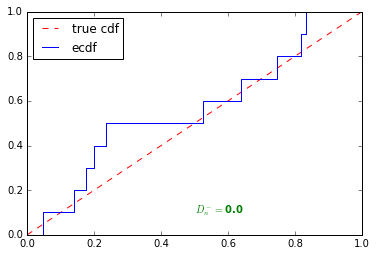

In [2]:
def ecdf(x):
    '''
       calculates the empirical cdf of data x
       returns the unique values of x in ascending order and the cumulative probabity at those values
       NOTE: This is not an efficient algorithm: it is O(n^2), where n is the length of x. 
       A better algorithm would rely on the Collections package or something similar and could work
       in O(n log n)
    '''
    theVals = sorted(np.unique(x))
    theProbs = np.array([sum(x <= v) for v in theVals])/float(len(x))
    if (theVals[0] > 0.0):
        theVals = np.append(0., theVals)
        theProbs = np.append(0., theProbs)
    return theVals, theProbs


def plotUniformKolmogorov(n):
    sam = np.random.uniform(size=n)
    v, pr = ecdf(sam)
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='true cdf')
    ax.step(v, pr, color='b', where='post', label='ecdf')
    ax.legend(loc='best')
    dLoc = np.argmax(v-pr)
    dMinus = (v-pr)[dLoc]
    ax.axvline(x=v[dLoc], ymin=pr[dLoc], ymax=v[dLoc], color='g', linewidth='4')
    ax.text(0.5, 0.1, r'$D_n^-=$' + str(round(dMinus, 3)), color='g', weight='heavy')

interact(plotUniformKolmogorov, n=widgets.IntSlider(min=3, max=300, step=1, value=10))
    

## The Massart-Dvoretzky-Kiefer-Wolfowitz (MDKW) Inequality and confidence set for $F$
Dvoretsky, Kiefer and Wolfowitz (1956, DKW) showed that
$$ 
	\mathbb P \{D_n^- > t\} \le C \exp(- 2 n t^2)
$$
for some constant $C$.

Massart (1990) showed that $C = 1$ is the sharp constant in the DKW inequality, provided 
$\exp(-2 n t^2) \le \frac{1}{2}$.
The distribution of $D_n^-$ is stochastically larger when 
$F$ is continuous than when $F$ has jumps (Massart 1990); thus the inequality conservative for iid 
sampling from finite populations.

Moreover, $D_n^-$ is stochastically larger for sampling with replacement than for sampling 
without replacement, so the inequality is conservative for sampling from a finite population
without replacement as well.

Let's call the inequality with $C=1$ the Massart-Dvoretsky-Kiefer-Wolfowitz (MDKW) inequality.
It follows from the MDKW inequality that
$$ 
    \mathbb P \left \{\sup_x (F(x) - \hat{F}_n(x)) > \sqrt{-\frac{\ln \alpha}{2n}} \right \} \le \alpha.
$$
That is, 
$$
    \mathcal C(X) \equiv \left \{ \mbox{cdfs } G: \sup_x (G(x) - \hat{F}_n(x)) \le  \sqrt{-\frac{\ln \alpha}{2n}} \right \}
$$
is a nonparametric confidence set for the true population cdf $F$.

## Using MDKW to get a lower confidence bound for the mean of a nonnegative population

We now assume all $\{x_j\}_{j=1}^N$ are nonnegative, so $F(0^-) = 0$.
The population mean is

$$ \frac{1}{N} \sum_{j=1}^N x_j = \int_0^\infty x dF(x).$$

But with probability at least $1-\alpha$, $F \in \mathcal C(X)$.
Hence 

$$
   \inf_{G \in \mathcal C(X)} \int_{0}^\infty x dG(x)
$$
is a lower $1-\alpha$ confidence bound for $\mu = \int_0^\infty x dF(x)$.

A little more explanation might help: whenever $F \in \mathcal C(X)$ (and perhaps more often),

$$\inf_{G \in \mathcal C(X)} \int_{0}^\infty x dG(x) \le \int_0^\infty x dF(x).$$
But $\mathbb P (C(X) \ni F) \ge 1-\alpha$.

Moreover, we can find confidence bounds for <em>an arbitrary collection of
functionals, even an uncountable collection</em> and they will have simultaneous coverage
probability $1-\alpha$: there is no need to adjust for multiplicity, since whenever
$F \in C(X)$, <em>all</em> the bounds hold.

This general approach&mdash;make a confidence set for an entire function, then use that
confidence set to derive confidence bounds on properties (parameters) of that function&mdash;is
extremely flexible, and gives conservative results.

### Among all $G \in \mathcal C(X)$, which has smallest mean?
It's the distribution function that has as much mass as possible as far "left" as possible, 
but never exceeds $\hat{F}_n$ by more than $\sqrt{-\frac{\ln \alpha}{2n}}$.

Let $G^-$ denote this cdf.

Then, 

$$
   G^-(x) = \left ( \hat{F}_n(x) +  \sqrt{-\frac{\ln \alpha}{2n}} \right ) \wedge 1,
$$ 

where $a \wedge b \equiv \min\{a, b\}$.

The corresponding lower confidence bound on $\mu$ is $\int_0^\infty x dG^-(x)$.

The integral is really a sum because $G^-$ is a step function.
Note that $G^-$ might have a jump at $x=0$ even if $\hat{F}_n$ does not, but the rest of its jumps are 
at (a subset of) the data. 

Let's implement this in code.

In [3]:
# find lower confidence bound on the mean of a non-negative population using the MDKW inequality

def massartOneSide(n, alpha):
    ''' 
       tolerable misfit between the cdf and ecdf for a one-sided bound 
       at significance level alpha for an iid sample of size n
    '''
    return np.sqrt(-np.log(alpha)/(2.0*n))
    
    
def ksLowerMean(x, c):
    '''
       lower confidence bound for the mean of a nonnegative population
       x is an iid sample with replacement from the population
       c is the Massart constant for the desired coverage
    '''
    # find the ecdf
    vals, probs = ecdf(x)
    probs = np.fmin(probs+c, 1)   # This is G^-
    gProbs = np.diff(np.append([0.0], probs))  # pre-pend a 0 so that diff does the right thing; 
                                               # gProbs is the vector of masses
    return (vals*gProbs).sum()

Now let's compare this approach to lower one-sided Student-t intervals in a simulation using a nonstandard mixture of distributions.

In [4]:
# Nonstandard mixture: a pointmass at 1 and a uniform[0,1]
ns = np.array([25, 50, 100, 400])  # sample sizes
ps = np.array([0.9, 0.99, 0.999])    # mixture fraction, weight of pointmass
alpha = 0.05  # 1- (confidence level)
reps = int(1.0e4) # just for demonstration

simTable = pd.DataFrame(columns=('mass at 1', 'sample size', 'Student-t cov',\
                                 'MDKW cov', 'Student-t low', 'MDKW low')
                       )

for p in ps:
    popMean = (1-p)*0.5 + p  # population is a mixture of uniform with mass (1-p) and
                             # pointmass at 1 with mass p
    
    for n in ns:
        tCrit = sp.stats.t.ppf(q=1-alpha, df=n-1)
        mCrit = np.sqrt(-np.log(alpha)/(2.0*n))  # the 1-sided MDKW constant
        coverT = 0
        coverM = 0
        lowT = 0.0
        lowM = 0.0
        
        for rep in range(int(reps)):
            sam = np.random.uniform(size=n)  # the uniform part of the sample
            ptMass = np.random.uniform(size=n)  # for a bunch of p-coin tosses
            sam[ptMass < p] = 1.0   # mix in pointmass at 1, with probability p
            # t interval
            samMean = np.mean(sam)
            samSD = np.std(sam, ddof=1)
            tLo = samMean - tCrit*samSD  # lower endpoint of the t interval
            coverT += ( tLo <= popMean )
            lowT += tLo
            #  MDKW interval
            mLo = ksLowerMean(sam, mCrit) # lower endpoint of the MDKW interval
            coverM += (mLo <= popMean )
            lowM += mLo

        simTable.loc[len(simTable)] =  p, n,\
            str(100*float(coverT)/float(reps)) + '%',\
            str(100*float(coverM)/float(reps)) + '%',\
            str(round(lowT/float(reps),4)),\
            str(round(lowM/float(reps),4))
#
ansStr =  '<h3>Simulated coverage probability and expected lower endpoint of ' +\
          'one-sided Student-t and MDKW confidence intervals for ' +\
          'mixture of U[0,1] and pointmass at 1 population</h3>' +\
          '<strong>Nominal coverage probability ' + str(100*(1-alpha)) +\
          '%</strong>.<br /><strong>Estimated from ' + str(int(reps)) + ' replications.</strong>'

display(HTML(ansStr))
display(simTable)

,mass at 1,sample size,Student-t cov,MDKW cov,Student-t low,MDKW low
0,0.900,25.0,89.92%,100.0%,0.6849,0.7054
1,0.900,50.0,98.67%,100.0%,0.6727,0.7775
2,0.900,100.0,99.98%,100.0%,0.6648,0.8276
3,0.900,400.0,100.0%,100.0%,0.6618,0.8888
4,0.990,25.0,22.21%,100.0%,0.9529,0.75
5,0.990,50.0,38.13%,100.0%,0.9425,0.822
6,0.990,100.0,62.33%,100.0%,0.9278,0.8726
7,0.990,400.0,97.72%,100.0%,0.907,0.9338
8,0.999,25.0,2.41%,100.0%,0.9952,0.7547
9,0.999,50.0,4.83%,100.0%,0.9934,0.8264


Note that sometimes the average lower bound for the MDKW interval is _larger_ even though it has better coverage. To some extent, that's because we have not truncated the Student-t interval below at 0, which would be legitimate.

Still, the length penalty for conservative coverage is modest, especially given that the nominal 95% Student-t interval has coverage below 2% in some of these scenarios.

## What else?

The MDKW inequality is not the only way to construct a confidence set for a cdf. One can also use differences of order statistics, among other things.  I have not compared the relative efficiency of such methods.

## What's next?
Next we consider confidence bounds for bounded populations, using common probability inequalities.

+ [Next: Wald's Sequential Probability Ratio Test](sprt.ipynb)
+ [Previous: Confidence bounds from the Chebychev and Hoeffding Inequalities](hoeffding.ipynb)
+ [Index](index.ipynb)

In [5]:
%run talkTools.py